## Partie Chaine de Markov (Part 1)
## fichier a completer par les etudiant.es
## L. Likforman

In [1]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

filename_A='bigramenglish.txt'
A=np.loadtxt(filename_A)
print(len(A))
filename_F='bigramfrancais.txt'
F=np.loadtxt(filename_F)
print(len(F))
dic={'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' '}
print(len(dic))

28
28
28


## I.2.a 
bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i.
A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?
Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre

In [2]:
''' 
A completer
'''
for i in range(len(A)):
    line = A[i]
    from_char = dic.get(str(i + 1))
    more_freq = dic.get(str(np.argmax(line) + 1))
    if from_char == ' ':
        from_char = 'space'
    if more_freq == ' ':
        more_freq = 'space'
    print(f'The most frequent character from {from_char} is {more_freq}')


The most frequent character from space is t
The most frequent character from a is n
The most frequent character from b is e
The most frequent character from c is o
The most frequent character from d is space
The most frequent character from e is space
The most frequent character from f is space
The most frequent character from g is space
The most frequent character from h is e
The most frequent character from i is n
The most frequent character from j is o
The most frequent character from k is space
The most frequent character from l is e
The most frequent character from m is e
The most frequent character from n is space
The most frequent character from o is n
The most frequent character from p is e
The most frequent character from q is u
The most frequent character from r is e
The most frequent character from s is space
The most frequent character from t is h
The most frequent character from u is r
The most frequent character from v is e
The most frequent character from w is a
The most

## I.2.b


La fonction etat_suivant génère un état (à t+1) à partir de l’état courant (à t) et à l’aide de la matrice de transitions et de la fonction de répartition.
Afficher sur un graphique la fonction de répartition 
pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à t+1.

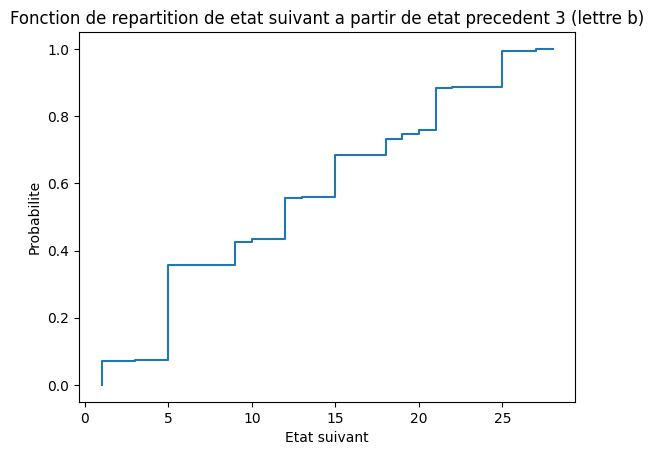

In [3]:
plt.step(range(1, 29), np.cumsum(A[2,]))
#plt.step()
plt.title('Fonction de repartition de etat suivant a partir de etat precedent 3 (lettre b)')
plt.xlabel('Etat suivant')
plt.ylabel('Probabilite') 
plt.show()

In [4]:
def etat_suivant(ligne_matrice_trans):
    '''
    La fonction génère un état (à t+1) à partir de l'état courant (à t) 
    La ligne de la matrice de transitions correspond aux probabilités 
    de transiter de l etat courant vers les autres etats.
    '''
    f_repartition = np.cumsum(ligne_matrice_trans)
    unif = np.random.random()
    stat = 0
    while(unif >= f_repartition[stat]):
        stat = stat+1
    return stat+1


Ecrire la fonction genere_state_seq 
qui génère une séquence d’états jusqu’à aboutir à l’état final (28). 
Puis ecrire une fonction display_seq qui transforme une séquence d’états 
en séquence de caractères, à l’aide d’un dictionnaire. 
Utiliser ces fonctions pour générer des mots.


In [5]:
def  generate_state_seq(A):
    
    """
    Calculate a sequence of states

    """  
    numStates = len(A)
    # Generate the emitting states sequence 
    t = 1
    stateSeq=[]   

    #    a completer

    while t != numStates:
        state = etat_suivant(A[t - 1])
        stateSeq.append(state)
        t = state
    
    return stateSeq


In [6]:
def display_seq(seq):
    str_seq = ""
    for i in seq:
        str_seq += dic.get(str(i))
    
    return str_seq

In [7]:
seq = generate_state_seq(A)

In [8]:
print(display_seq(seq))

mifure 


# I.2.c

On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.

In [9]:
def modifie_mat_dic(A,dic) :
    dic['29']='.'
    A_mod=np.zeros((29,29))

    for i in range(27):
        for j in range(28):
            A_mod[i,j] = A[i,j]

    A_mod[27,0] = 0.9
    A_mod[27,28] = 0.1
    A_mod[28,28] = 1

    return A_mod,dic

In [10]:
Amod,dicmod=modifie_mat_dic(A,dic)

In [11]:
def genere_phrase(A,dic) :
    t=1
    numStates=len(dic)
    stateSeq=[]
    # stateSeq est une liste
    while t != numStates:
        state = etat_suivant(A[t - 1])
        stateSeq.append(state)
        t = state
    
    return stateSeq

In [12]:
print('generation de phrases  :')
for i in range (5) :
    state_seq=genere_phrase(Amod,dicmod)
    # print(state_seq)

    print(display_seq(state_seq))


generation de phrases  :
te  che  c  mililen  of  whis  owal  m  u  sande  may  yortlancretheliblidis  sa .
re  tue  dr  tobind  istene  is  dieritorkerory  n  tronaust .
are  wan  th .
ackid  thioo  hesterel  a  and  sthone  w  hes  ndere .
isstheme  the  decllos  astnounoomancthedect  fomathapathirs  shem  aveconth  rilfis  of  mest  beee  ly  phe  and .


## I.3


In [13]:
#transformer les espaces en +/- dans le dictionnaire et inversion
dicmod['1']='-'
dicmod['28']='+'
dicmod['29']='.'

Charger la matrice des transitions entre caractères pour le français. Ecrire une fonction calc_vraisemblance qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.


In [14]:
def calc_vraisemblance(string, dic, mat):
    dicInv = {v: k for k, v in dic.items()}
    vraisemblance = 1.0
    state = int(dicInv[string[0]])
    
    for i in range(1, len(string)):
        next_state = int(dicInv[string[i]])
        transition_prob = mat[state - 1, next_state - 1]
        vraisemblance *= transition_prob
        state = next_state
    
    return vraisemblance


Calculer la vraisemblance des modèles français et anglais pour la phrase « to be or not to be ». De même calculer la vraisemblance des modèles français et anglais pour la phrase « etre ou ne pas etre ».

In [15]:
sentence = "-to+-be+-or+-not+-to+-be+."
# Example usage
F_mod, dicmod = modifie_mat_dic(F, dic)
dicmod['1']='-'
dicmod['28']='+'
dicmod['29']='.'
likelihood = calc_vraisemblance(sentence, dicmod, F_mod)
print("Likelihood:", likelihood)

Likelihood: 5.9602081018686406e-30
